In [1]:
import os 
import tarfile 
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/" 
HOUSING_PATH = "datasets/housing" 
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"


In [2]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):    
    if not os.path.isdir(housing_path):        
        os.makedirs(housing_path)    
    tgz_path = os.path.join(housing_path, "housing.tgz")    
    urllib.request.urlretrieve(housing_url, tgz_path)    
    housing_tgz = tarfile.open(tgz_path)    
    housing_tgz.extractall(path=housing_path)    
    housing_tgz.close()

In [3]:
fetch_housing_data(HOUSING_URL, HOUSING_PATH)

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):    
    csv_path = os.path.join(housing_path, "housing.csv")    
    return pd.read_csv(csv_path)


In [5]:
df = load_housing_data()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
#value_counts() function to categorize the data

df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,15)) 
plt.show()


<Figure size 2000x1500 with 9 Axes>

In [9]:
import numpy as np
def split_train_test(data, test_ratio):    
    shuffled_indices = np.random.permutation(len(data))    
    test_set_size = int(len(data) * test_ratio)    
    test_indices = shuffled_indices[:test_set_size]    
    train_indices = shuffled_indices[test_set_size:]    
    return data.iloc[train_indices], data.iloc[test_indices] 

In [10]:
train_set, test_set = split_train_test(df, 0.2) 

In [11]:
print(len(train_set), "train +", len(test_set))

16512 train + 4128


In [12]:
df["income_cat"] = np.ceil(df["median_income"] / 1.5) 
df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace=True) 

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(df, df["income_cat"]):    
    strat_train_set = df.loc[train_index]    
    strat_test_set = df.loc[test_index] 

In [15]:
 df["income_cat"].value_counts() / len(df) 

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [16]:
for set in (strat_train_set, strat_test_set):    
    set.drop(["income_cat"], axis=1, inplace=True) 

In [17]:
df = strat_train_set.copy()

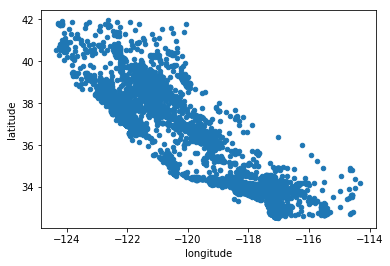

In [19]:
df.plot(kind="scatter", x="longitude", y="latitude")

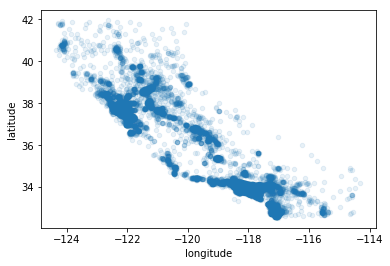

In [20]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)

The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices):15


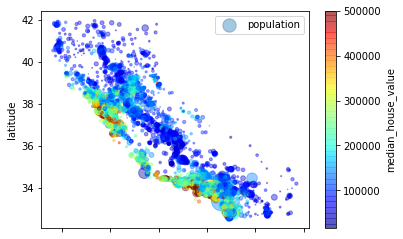

In [21]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=df["population"]/100, label="population",c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True) 
plt.legend()


In [22]:
corr_matrix = df.corr()

In [23]:
 corr_matrix["median_house_value"].sort_values(ascending=False) 

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

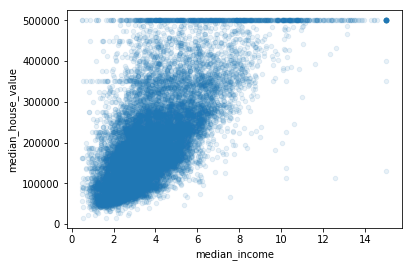

In [24]:
df.plot(kind="scatter", x="median_income", y="median_house_value",             alpha=0.1)


In [25]:
df["rooms_per_household"] = df["total_rooms"]/df["households"] 
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"] 
df["population_per_household"]=df["population"]/df["households"] 

In [26]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False) 

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [27]:
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy() 

In [28]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median") 

C:\Users\USER\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [30]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [31]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [33]:
X = imputer.transform(housing_num)

In [34]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [35]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded 

array([0, 0, 4, ..., 1, 0, 3])

In [37]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [38]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

C:\Users\USER\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer() >>> housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot